# **A project that explore EDA, linear regression, Multiple Linear Regression, Decision Tree, Random Forest Model, and Logistic Regression Model to predict heart diseases**

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.calibration import calibration_curve
import joblib, os


In [106]:
df = pd.read_csv("C:/Users/USER/Downloads/archive (2).zip")

In [107]:
df.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [108]:
df.tail(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
260,58,0,3,120,340,0,0,172,0,0.0,1,0,3,Absence
261,60,1,4,130,206,0,2,132,1,2.4,2,2,7,Presence
262,58,1,2,120,284,0,2,160,0,1.8,2,0,3,Presence
263,49,1,2,130,266,0,0,171,0,0.6,1,0,3,Absence
264,48,1,2,110,229,0,0,168,0,1.0,3,0,7,Presence
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [110]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [111]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [112]:
df["Age"] = df["Age"].astype(int) 

In [113]:
df["BP"] = df["BP"].astype(int)

In [114]:
df.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [115]:
X = df[['Cholesterol']]   # Dataframe
y = df['BP']
df[['BP', 'Cholesterol']].head(5)

,BP,Cholesterol
0,130,322
1,115,564
2,124,261
3,128,263
4,120,269


In [116]:
df[['BP', 'Cholesterol']].describe()

,BP,Cholesterol
count,270.000000,270.000000
mean,131.344444,249.659259
std,17.861608,51.686237
min,94.000000,126.000000
25%,120.000000,213.000000
50%,130.000000,245.000000
75%,140.000000,280.000000
max,200.000000,564.000000


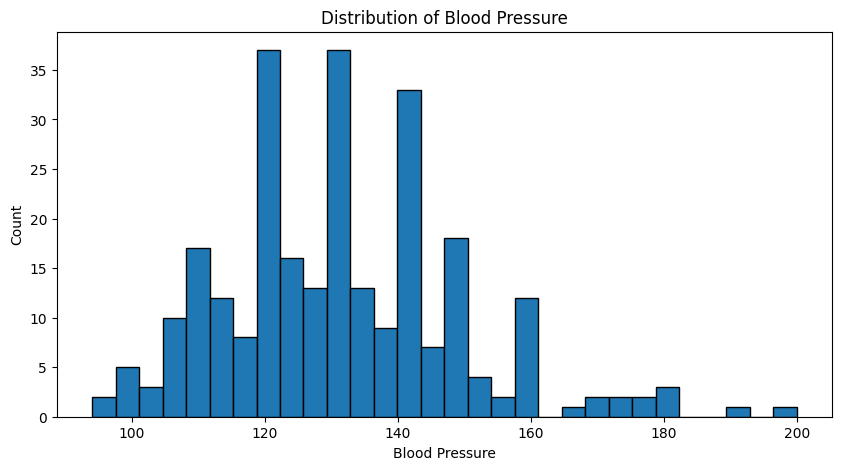

In [117]:
# Histogram for BP
plt.figure(figsize=(10,5))
plt.hist(df['BP'], bins=30, edgecolor='black')
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()

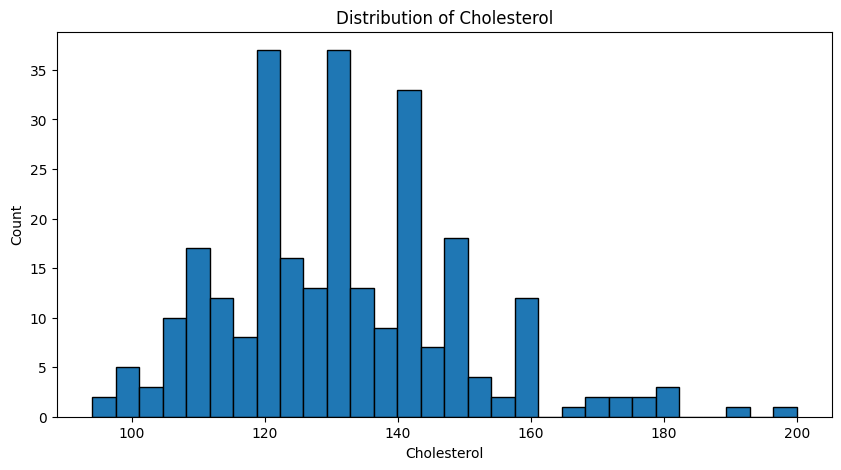

In [118]:
# Histogram for Cholesterol
plt.figure(figsize=(10,5))
plt.hist(df['BP'], bins=30, edgecolor='black')
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

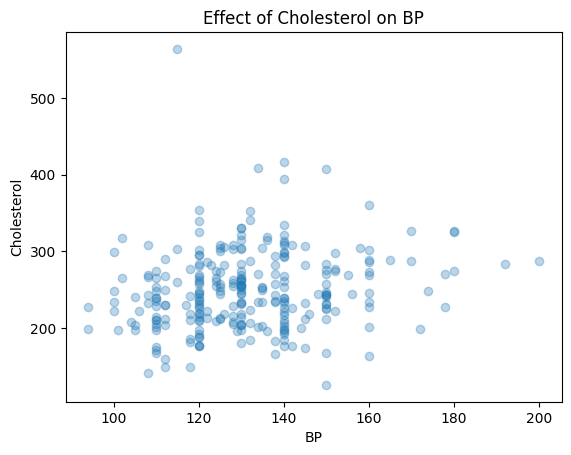

In [119]:
plt.scatter(df['BP'], df['Cholesterol'], alpha=0.3)
plt.xlabel('BP')
plt.ylabel('Cholesterol')
plt.title('Effect of Cholesterol on BP')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

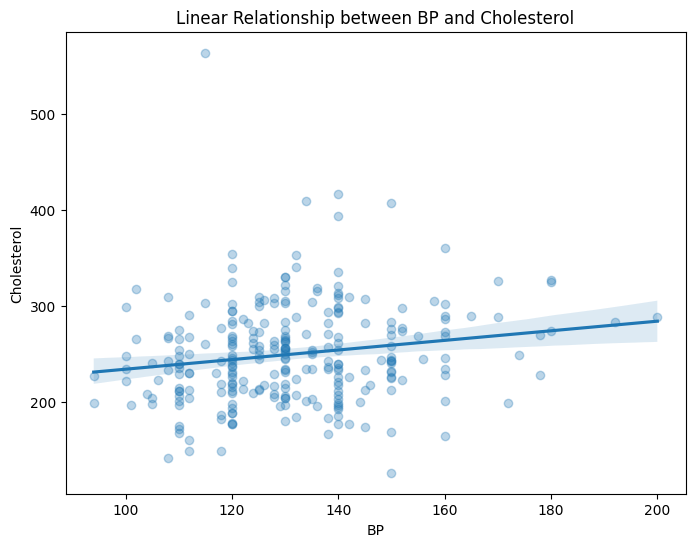

In [120]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x="BP", y="Cholesterol", scatter_kws={'alpha':0.3})
plt.title("Linear Relationship between BP and Cholesterol")
plt.xlabel("BP")
plt.ylabel("Cholesterol")
plt.show

### The plot above shows that increase in Cholesterol lead to an increase in BP.

In [121]:
#Calculation of Covariance for the df
numeric_df = df.select_dtypes(include=['number'])
numeric_df.cov(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,82.975093,-0.402602,0.838786,44.426394,103.605452,0.400248,1.165056,-84.874721,0.421685,2.026208,0.894176,3.061586,1.875589
Sex,-0.402602,0.219207,0.015407,-0.524287,-4.879719,0.007022,0.018340,-0.825403,0.039694,0.052230,0.014539,0.038373,0.355308
Chest pain type,0.838786,0.015407,0.902671,-0.733044,4.442434,-0.033320,0.070467,-6.992028,0.158020,0.181970,0.079912,0.202575,0.484290
BP,44.426394,-0.524287,-0.733044,319.037051,159.731185,0.989674,2.070384,-16.193432,0.696448,4.557435,1.563486,1.444816,4.577117
Cholesterol,103.605452,-4.879719,4.442434,159.731185,2671.467107,0.463307,8.647005,-22.437340,1.904557,1.640149,-0.182762,6.173510,2.892414
FBS over 120,0.400248,0.007022,-0.033320,0.989674,0.463307,0.126669,0.019000,0.185461,-0.000688,-0.010409,0.009638,0.041581,0.034008
EKG results,1.165056,0.018340,0.070467,2.070384,8.647005,0.019000,0.995787,-1.725155,0.044692,0.137175,0.098472,0.107724,0.014209
Max HR,-84.874721,-0.825403,-6.992028,-16.193432,-22.437340,0.185461,-1.725155,536.650434,-4.153614,-9.260037,-5.505907,-5.801776,-11.391904
Exercise angina,0.421685,0.039694,0.158020,0.696448,1.904557,-0.000688,0.044692,-4.153614,0.221795,0.148141,0.074047,0.068167,0.293790
ST depression,2.026208,0.052230,0.181970,4.557435,1.640149,-0.010409,0.137175,-9.260037,0.148141,1.311506,0.428996,0.275651,0.720818


### Let visualise the dataframe with corr()

#### Correlation Analysis

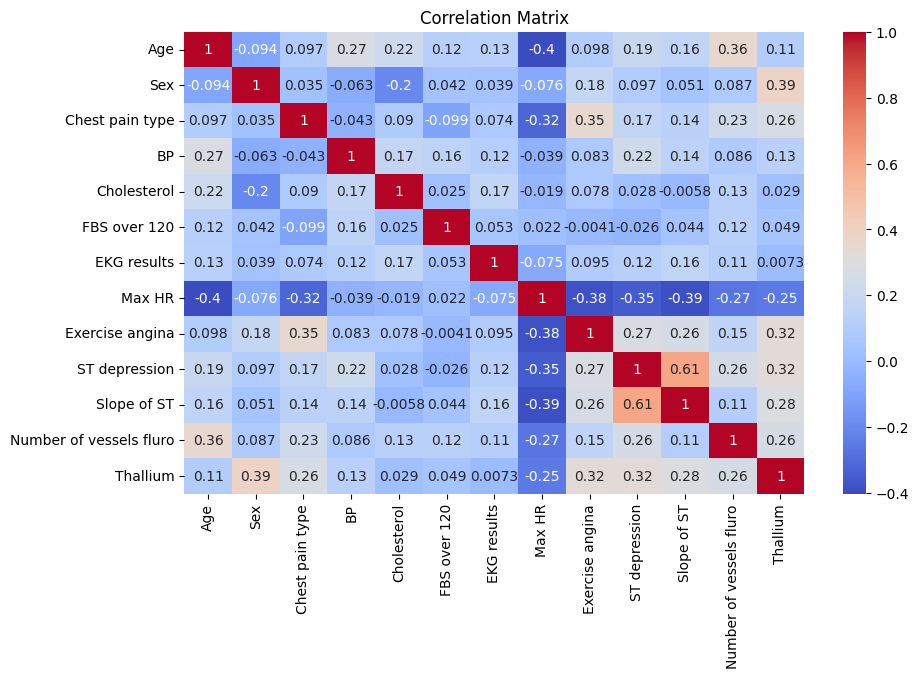

In [122]:
correlation_matrix = numeric_df.corr()
correlation_matrix

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

## From the plot above, 

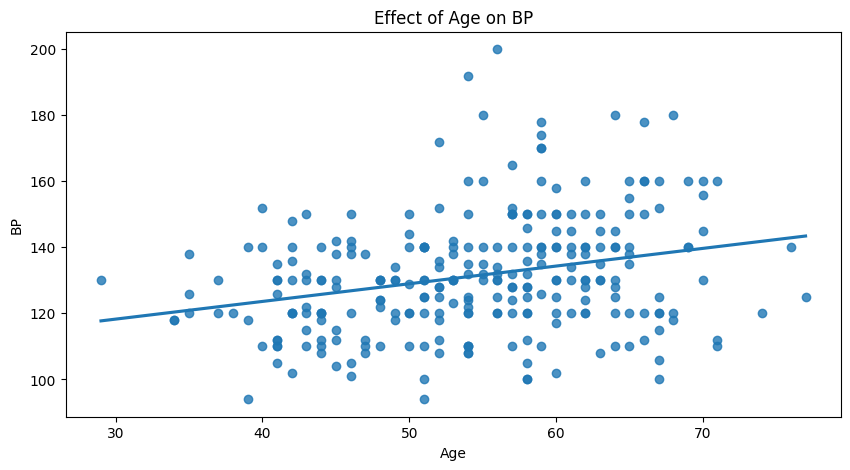

In [123]:
plt.figure(figsize=(10,5))
sns.regplot(x=df["Age"], y=df["BP"], ci=None) 
plt.xlabel("Age") 
plt.ylabel("BP")
plt.title("Effect of Age on BP")
plt.show()

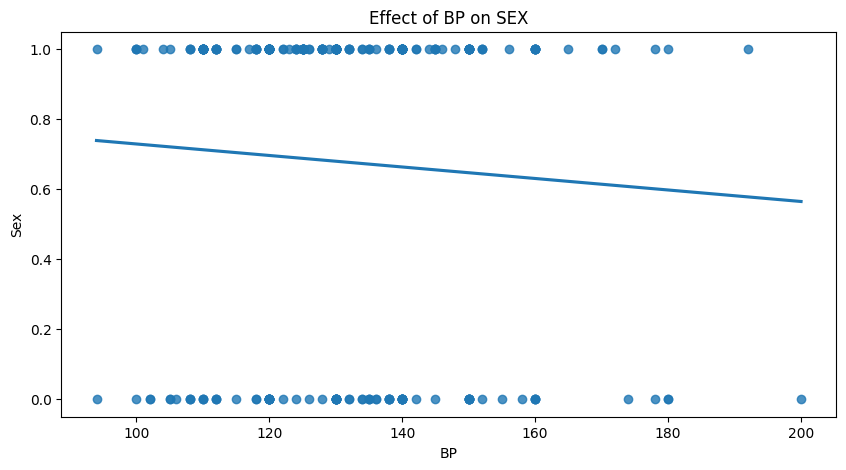

In [124]:
plt.figure(figsize=(10,5))
sns.regplot(x=df["BP"], y=df["Sex"], ci=None)
plt.xlabel("BP")
plt.ylabel("Sex")
plt.title("Effect of BP on SEX")
plt.show()

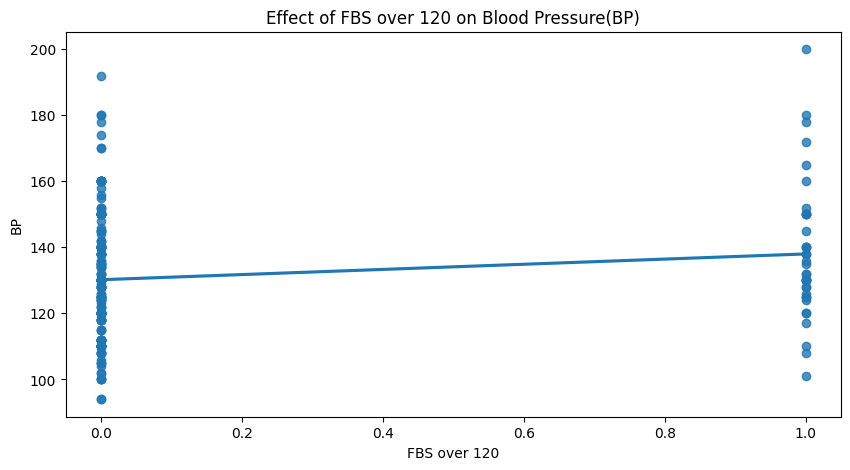

In [125]:
plt.figure(figsize=(10,5))
sns.regplot(x=df["FBS over 120"], y=df["BP"], ci=None)
plt.xlabel("FBS over 120")
plt.ylabel("BP")
plt.title("Effect of FBS over 120 on Blood Pressure(BP)")
plt.show()

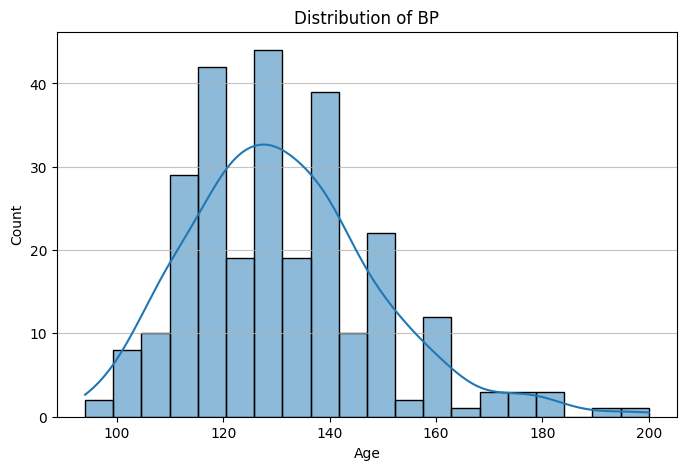

In [126]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="BP", kde=True, bins=20)
plt.title("Distribution of BP")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.75) #alpha is thickness of seaborn
plt.show()

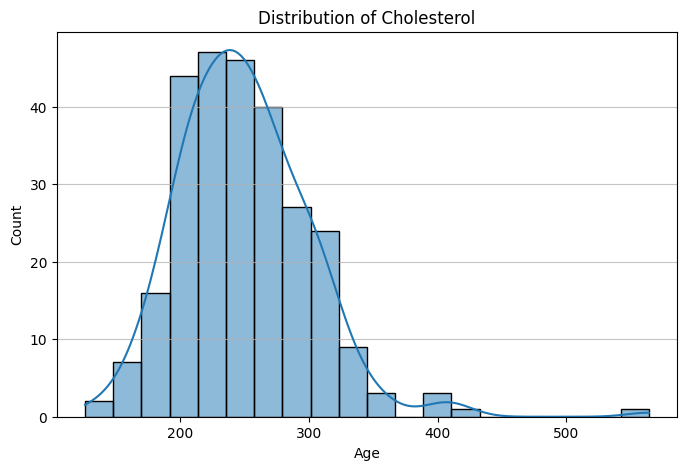

In [127]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Cholesterol", kde=True, bins=20)
plt.title("Distribution of Cholesterol")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.75) #alpha is thickness of seaborn
plt.show()

<Figure size 1200x800 with 0 Axes>

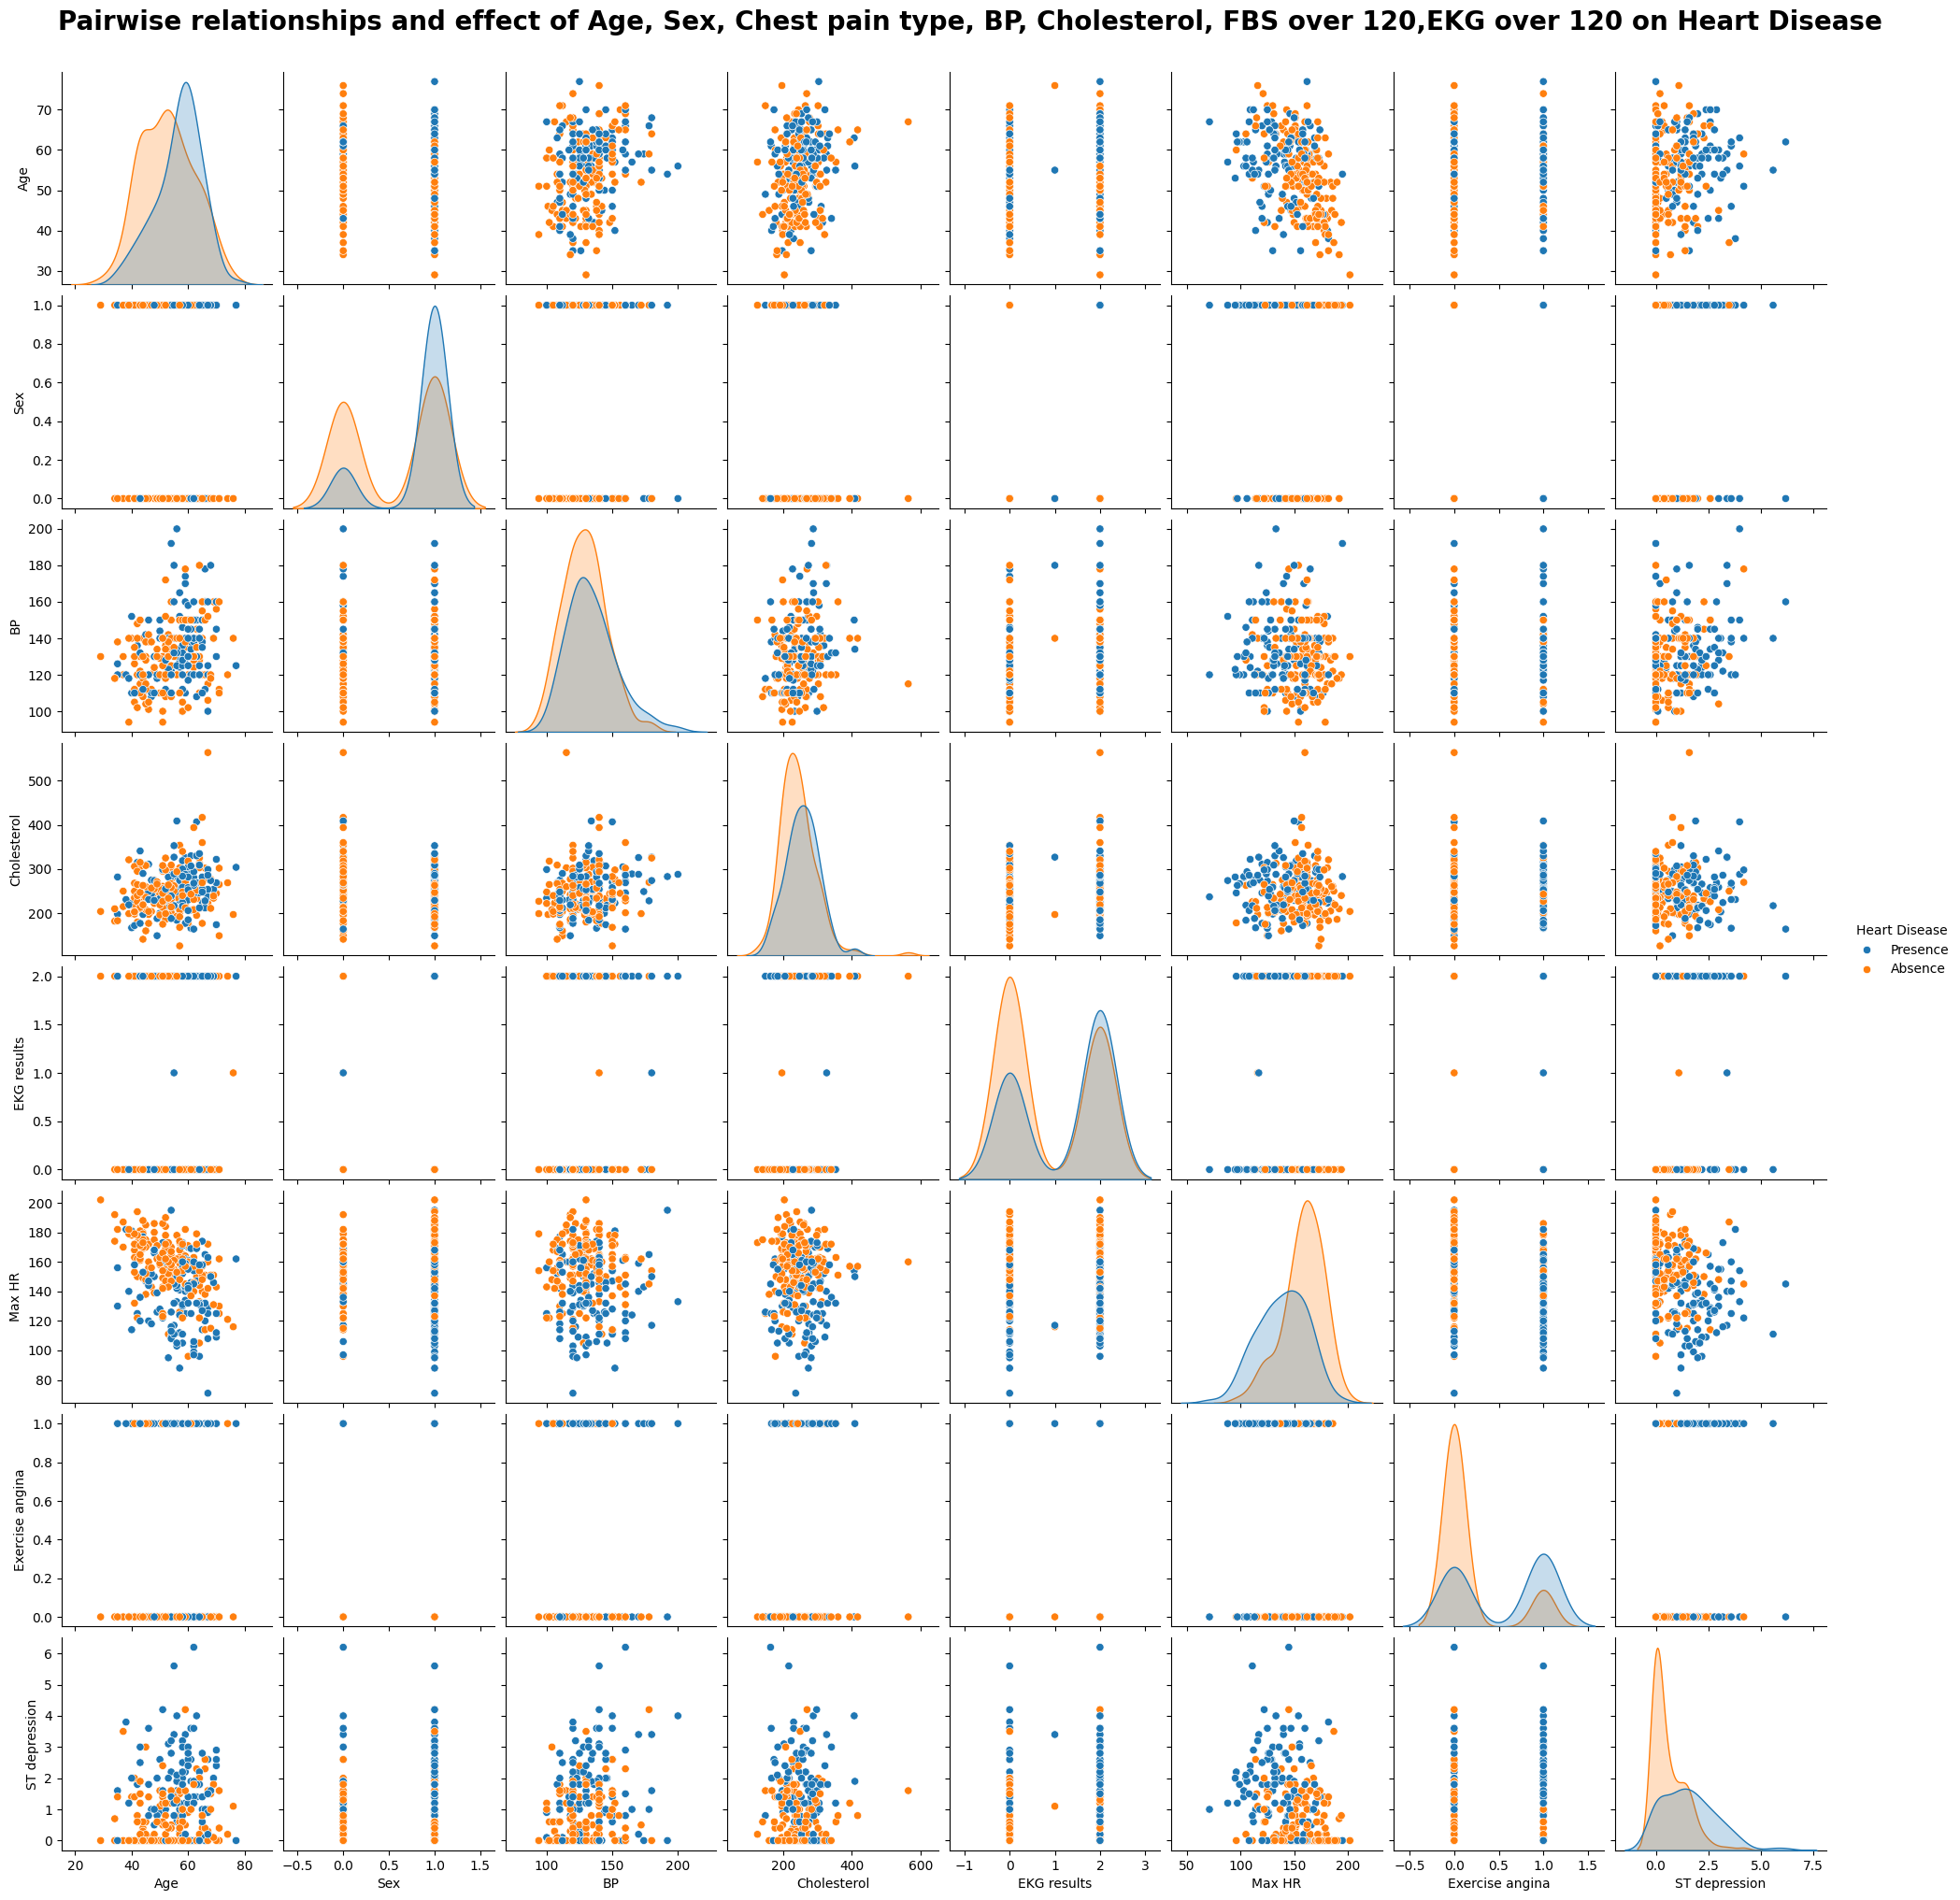

In [128]:
#Pairplot for major Column in the date frame
plt.figure(figsize=(12, 8))
sns.pairplot(df[['Age','Sex','BP','Cholesterol','EKG results','Max HR','Exercise angina','ST depression','Heart Disease']], hue='Heart Disease', diag_kind='kde')
plt.suptitle("Pairwise relationships and effect of Age, Sex, Chest pain type, BP, Cholesterol, FBS over 120,EKG over 120 on Heart Disease",fontsize=20,fontweight="bold", y=1.02) # Adjust suptitle position
plt.show()

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

### Simple Linear Regression

In [130]:
X = df[['Cholesterol']]   # Dataframe
y = df['BP']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [131]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [132]:
y_pred = model.predict(X)
results_df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
display(results_df.head(10)) 

,Actual,Predicted
0,130,135.772583
1,115,149.259308
2,124,132.373037
3,128,132.484498
4,120,132.818879
5,120,127.691695
6,130,132.094386
7,110,131.146971
8,140,134.156406
9,150,140.509656


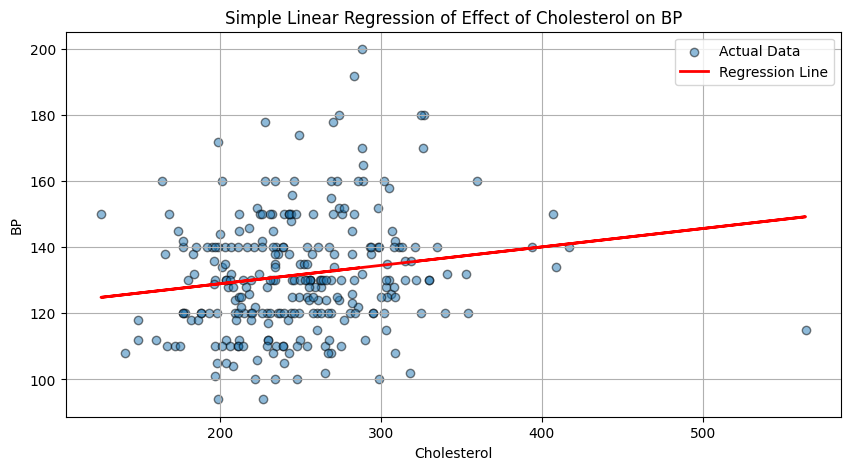

In [133]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, alpha=0.5, edgecolor='k', label='Actual Data')

plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Cholesterol")
plt.ylabel("BP")
plt.title("Simple Linear Regression of Effect of Cholesterol on BP")
plt.legend()
plt.grid(True)
plt.show()


## Multiple Regression Model

In [134]:
# Features (multiple predictors): Features we want to train the model on
X = df[['Age','Sex','Cholesterol','EKG results','Max HR','Exercise angina','ST depression']]

# Target variable
y = df['BP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
model = LinearRegression() 
model.fit(X_train, y_train) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [136]:
# Coefficients for each feature(slop)
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

# Intercept
intercept = model.intercept_

display(coefficients)
print(f"Intercept: {intercept}")


,Feature,Coefficient
0,Age,0.401045
1,Sex,-1.592434
2,Cholesterol,0.033062
3,EKG results,1.624952
4,Max HR,0.064901
5,Exercise angina,0.076596
6,ST depression,3.518527


Intercept: 87.39868743271032


In [137]:
y_pred = model.predict(X_train)
results_df = pd.DataFrame({
    'Actual': y_train,
    'Predicted': y_pred
})

display(results_df.head(10))


,Actual,Predicted
115,134,126.523711
33,170,144.621817
184,130,129.672715
142,140,126.251973
197,110,132.014426
37,160,129.856415
16,140,128.734734
75,142,126.936448
148,132,142.209855
10,135,129.412783


In [138]:
y_pred_test = model.predict(X_test)
results_test = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test
})

display(results_test.head(10))

,Actual,Predicted
30,128,130.629523
116,120,127.897281
79,120,130.434649
127,136,129.303241
196,100,133.545073
137,125,133.391735
209,130,133.361802
45,140,130.001552
158,120,135.094840
247,155,134.780510


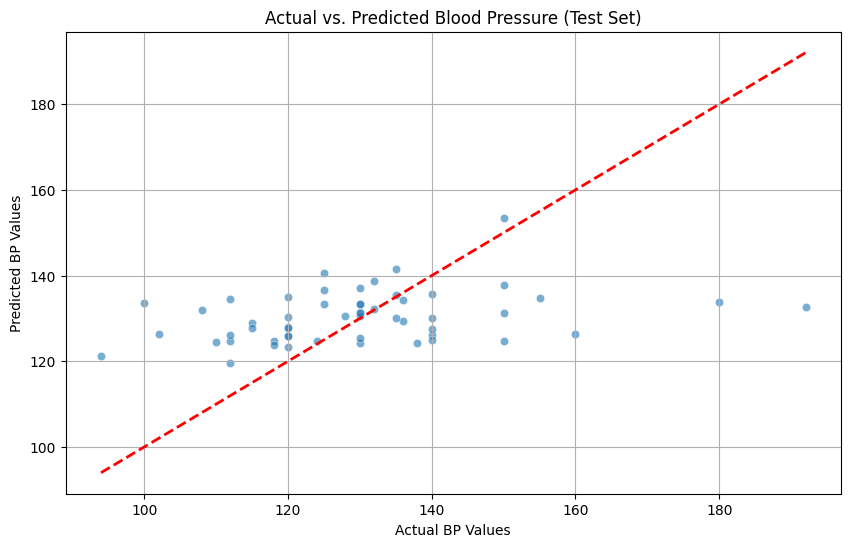

In [139]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual BP Values')
plt.ylabel('Predicted BP Values')
plt.title('Actual vs. Predicted Blood Pressure (Test Set)')
plt.grid(True)
plt.show()

This plot helps us visually assess:
*   **How close the predicted values are to the actual values.**
*   **Some points were consistently above while some were below the red line, it indicates a systematic over- and under-prediction respectively**.
*   **It showed that spread out the predictions are for similar actual values.
*   **Outliers:** Any points that are far off from the red line, indicating predictions that are significantly different from the actual values.

### Let do Evaluation metrics to confirm.

In [140]:
from sklearn.metrics import mean_absolute_error

# Calculate metrics
MAE = mean_absolute_error(y_test, y_pred_test)

# Round the results
MAE = round(MAE, 2)

# Print results
print(MAE)

12.19


In [141]:
average_BP = df['BP'].mean()
MAE_percentage_of_avg = (MAE / average_BP) * 100

print(round(MAE_percentage_of_avg, 2))

9.28


### Industry standard for % Error: less than 20% While 20% and above is considered high.So, the error is minimal.

In [142]:
from sklearn.metrics import r2_score

# Calculate R-squared for the training set
r2_train = r2_score(y_train, y_pred)

# Calculate R-squared for the test set
r2_test = r2_score(y_test, y_pred_test)

print(round(r2_train, 2))
print(round(r2_test, 2))

0.14
0.11


*   **0.0 - 0.3: Very low or no linear relationship.**
**So, it has very low linear relationship, it was displayed in the plot above too. so we further use some other model for this data set.**

# **Decision Tree Regression**

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn import tree

In [144]:
df_dec = pd.read_csv("C:/Users/USER/Downloads/archive (2).zip")

In [145]:
df_dec.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [146]:
df_dec.tail(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
260,58,0,3,120,340,0,0,172,0,0.0,1,0,3,Absence
261,60,1,4,130,206,0,2,132,1,2.4,2,2,7,Presence
262,58,1,2,120,284,0,2,160,0,1.8,2,0,3,Presence
263,49,1,2,130,266,0,0,171,0,0.6,1,0,3,Absence
264,48,1,2,110,229,0,0,168,0,1.0,3,0,7,Presence
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [147]:
df_dec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [148]:
# Drop missing values
df_dec = df_dec.dropna()

# Features and target
X = df_dec[['Age','Sex','Cholesterol','EKG results','Max HR','Exercise angina','ST depression']]

y = df_dec['BP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
dt_regressor = DecisionTreeRegressor(
#Hyper parameters:
    max_depth=10,           # Limit depth to prevent overfitting
    min_samples_split=20,   # Minimum samples required to split a node
    min_samples_leaf=10,    # Minimum samples required at a leaf node
    random_state=42
)

dt_regressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,20
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [150]:
y_pred_train = dt_regressor.predict(X_train)
print(y_pred_train)

[119.125      155.8        136.2        119.125      127.5
 148.625      135.41176471 127.83333333 155.8        149.36363636
 119.125      136.2        127.5        121.         121.
 129.77777778 129.77777778 149.36363636 125.53846154 135.33333333
 149.36363636 129.77777778 121.         125.53846154 148.625
 121.         127.83333333 125.53846154 115.84615385 135.41176471
 135.33333333 128.72727273 127.83333333 121.         130.23076923
 119.125      127.5        130.23076923 130.23076923 148.625
 127.83333333 115.84615385 119.125      125.53846154 115.84615385
 121.         125.53846154 127.5        135.33333333 129.77777778
 129.77777778 129.77777778 148.625      129.77777778 155.8
 128.72727273 121.         119.125      132.6        135.41176471
 119.125      129.77777778 155.8        135.41176471 135.33333333
 115.84615385 148.625      127.83333333 136.2        119.125
 128.72727273 135.33333333 132.6        136.2        127.83333333
 125.53846154 136.2        127.5        127.833

In [151]:
# Create a DataFrame for actual vs predicted values on the train set
results_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train})
display(results_df.head(10))

,Actual,Predicted
115,134,119.125000
33,170,155.800000
184,130,136.200000
142,140,119.125000
197,110,127.500000
37,160,148.625000
16,140,135.411765
75,142,127.833333
148,132,155.800000
10,135,149.363636


## It has nice prediction.

# let check the testset, which is our major focus

In [152]:
# Make predictions for the test dataset
y_pred_test = dt_regressor.predict(X_test)
print(y_pred_test)

[125.53846154 127.83333333 125.53846154 127.5        125.53846154
 125.53846154 135.41176471 125.53846154 125.53846154 128.72727273
 127.83333333 125.53846154 135.41176471 125.53846154 130.23076923
 136.2        128.72727273 119.125      128.72727273 125.53846154
 128.72727273 136.2        115.84615385 136.2        135.41176471
 155.8        135.41176471 135.33333333 115.84615385 127.83333333
 119.125      119.125      136.2        121.         127.83333333
 125.53846154 115.84615385 130.23076923 148.625      132.6
 119.125      127.5        135.41176471 121.         121.
 128.72727273 129.77777778 135.33333333 127.5        136.2
 129.77777778 127.83333333 136.2        127.5       ]


In [153]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
display(results_df.head(10))

,Actual,Predicted
30,128,125.538462
116,120,127.833333
79,120,125.538462
127,136,127.500000
196,100,125.538462
137,125,125.538462
209,130,135.411765
45,140,125.538462
158,120,125.538462
247,155,128.727273


### From the plot above , the prediction was close to the actual value. it really good.

### Evaluation Metrics

In [154]:
# Calculate metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print("Training R² Score:", round(train_r2, 4))
print("Test R² Score:", round(test_r2, 4))

print("Training MAE:", round(train_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training R² Score: 0.335
Test R² Score: 0.0259
Training MAE: 11.46
Test MAE: 13.41


In [155]:
average_house_price = df_dec['BP'].mean()
MAE_percentage_of_avg = (test_mae / average_house_price) * 100
#mae% of less than20 is the standard

print(f"MAE Percetage is:  {round(MAE_percentage_of_avg, 2)}, which is very good.")

MAE Percetage is:  10.21, which is very good.


### **Feature Importance**

In [156]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_regressor.feature_importances_
}).sort_values('importance', ascending=False)

display(feature_importance)

,feature,importance
0,Age,0.350905
2,Cholesterol,0.293358
6,ST depression,0.275705
4,Max HR,0.052137
3,EKG results,0.027896
1,Sex,0.000000
5,Exercise angina,0.000000


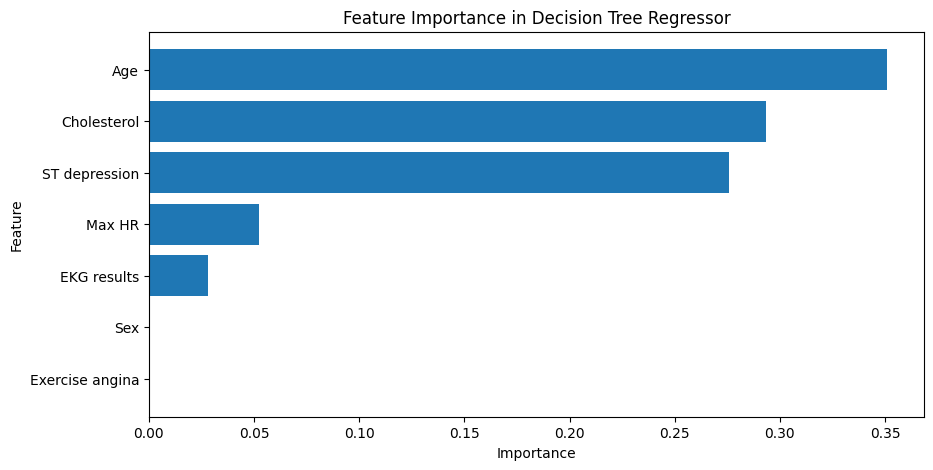

In [157]:
sorted_importance = feature_importance.sort_values(by = 'importance', ascending=True)

plt.figure(figsize=(10, 5))
plt.barh(sorted_importance['feature'], sorted_importance['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Regressor')
plt.show()

## Plotting actual vs predicted values for the testing set


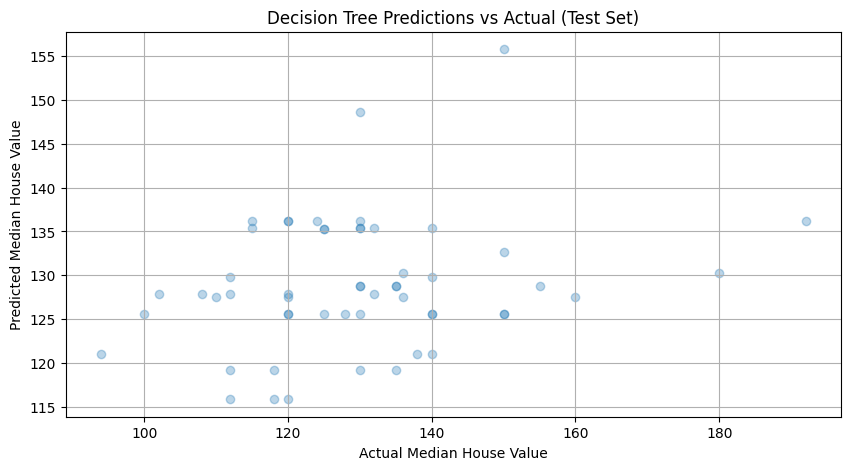

In [158]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Decision Tree Predictions vs Actual (Test Set)")
plt.grid(True)
plt.show()

##  Visualizing a small portion of the tree (first few levels

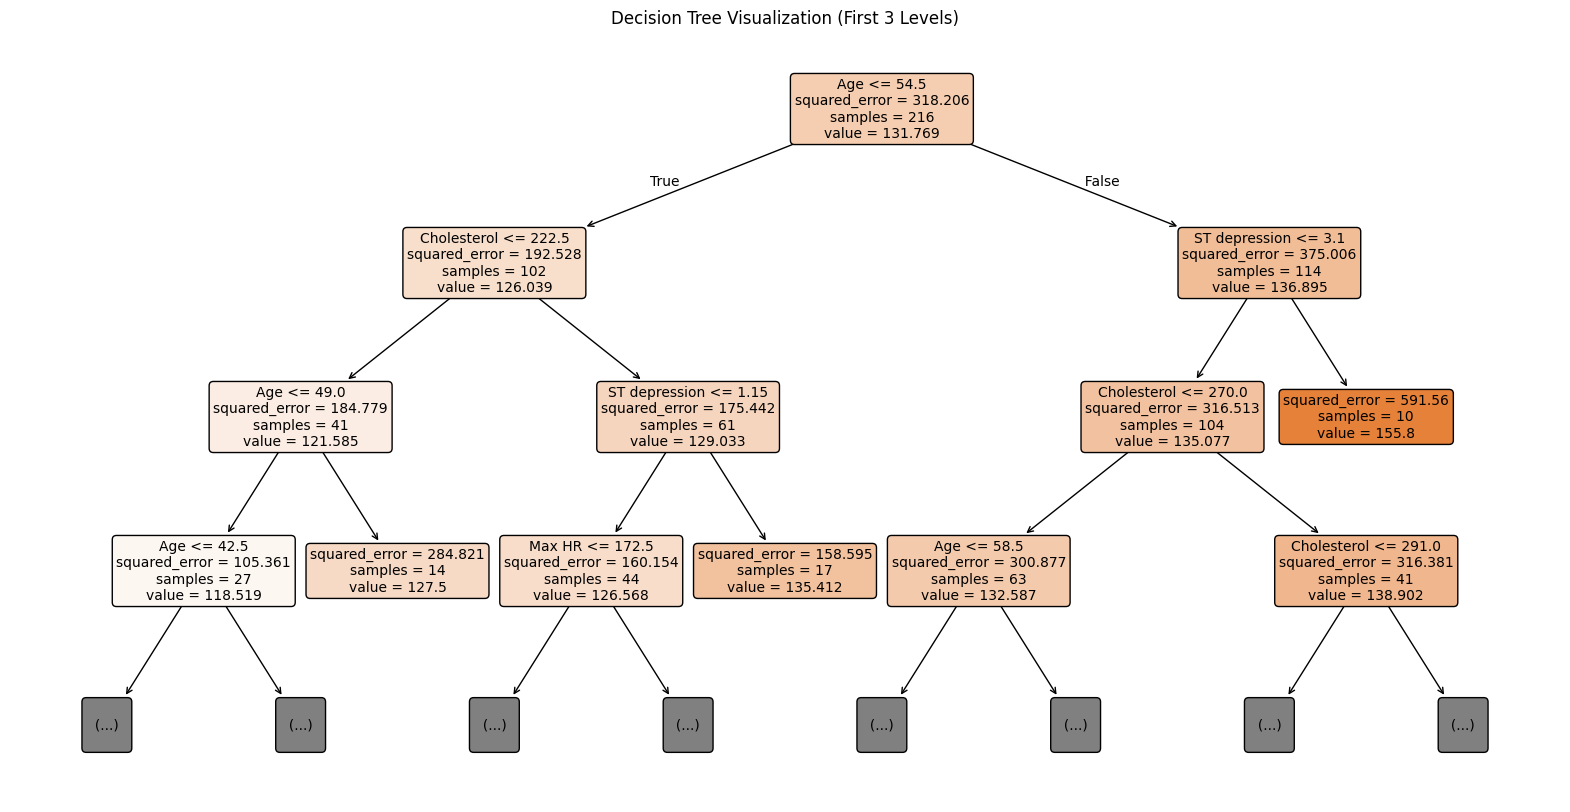

In [159]:
# Visualize a small portion of the tree (first few levels)

plt.figure(figsize=(20, 10))
features = X.columns   #Define features using the DataFrame columns
tree.plot_tree(dt_regressor,
               feature_names=features,
               max_depth=3,  #Show only first 3 levels for readability
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Decision Tree Visualization (First 3 Levels)')
plt.show()

### Instead of buiding a single decision tree, let build a random forest. 

# **Random Forest Regression**

In [160]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(
    n_estimators=100,      # Number of decision trees in the forest
    max_depth=10,          # Limit depth of each tree
    min_samples_split=20,  # Minimum samples required to split a node
    min_samples_leaf=10,   # Minimum samples required at a leaf node
    random_state=42,
    n_jobs=-1              # Use all available CPU cores
)

rf_regressor.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,20
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [161]:
# Make predictions for the training dataset
y_pred_train_rf = rf_regressor.predict(X_train)

# Make predictions for the test dataset
y_pred_test_rf = rf_regressor.predict(X_test)

# Let display some predictions
print("Random Forest Predictions (Training Set - first 10):")
print(y_pred_train_rf[:10])
print("\nRandom Forest Predictions (Test Set - first 10):")
print(y_pred_test_rf[:10])

Random Forest Predictions (Training Set - first 10):
[127.44842937 147.02519898 131.37689674 128.89070211 127.00464374
 140.28214322 131.36482046 128.96306531 140.20427986 134.17661647]

Random Forest Predictions (Test Set - first 10):
[130.2244152  129.63844417 135.06294463 125.50955955 135.34690426
 133.21113145 136.71360419 131.45435351 133.9728902  139.6925596 ]


### Create a DataFrame for actual vs predicted values on the train set


In [162]:
results_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train_rf})
display(results_df.head(10))

,Actual,Predicted
115,134,127.448429
33,170,147.025199
184,130,131.376897
142,140,128.890702
197,110,127.004644
37,160,140.282143
16,140,131.364820
75,142,128.963065
148,132,140.204280
10,135,134.176616


###  Evaluting Random Forest model

In [163]:

rf_train_r2 = r2_score(y_train, y_pred_train_rf)
rf_test_r2 = r2_score(y_test, y_pred_test_rf)

rf_train_mae = mean_absolute_error(y_train, y_pred_train_rf)
rf_test_mae = mean_absolute_error(y_test, y_pred_test_rf)

print("Training R² Score:", round(rf_train_r2, 4))
print("Test R² Score:", round(rf_test_r2, 4))

print("Training MAE:", round(rf_train_mae, 2))
print("Test MAE:", round(rf_test_mae, 2))

Training R² Score: 0.3102
Test R² Score: 0.1308
Training MAE: 11.58
Test MAE: 12.03


In [164]:
Average_BP = df_dec['BP'].mean()
MAE_percentage_of_avg = (rf_test_mae / average_BP) * 100


print(f"MAE Percetage is:  {round(MAE_percentage_of_avg, 2)}, which is very good.")

MAE Percetage is:  9.16, which is very good.


## **Obviously, Random Forest improves Decision tree model.**

### Feature importance for Random Forest

In [165]:

rf_feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_regressor.feature_importances_
}).sort_values('importance', ascending=False)

display(rf_feature_importance)

,feature,importance
0,Age,0.334376
2,Cholesterol,0.239568
6,ST depression,0.215607
4,Max HR,0.135774
3,EKG results,0.031924
1,Sex,0.022129
5,Exercise angina,0.020622


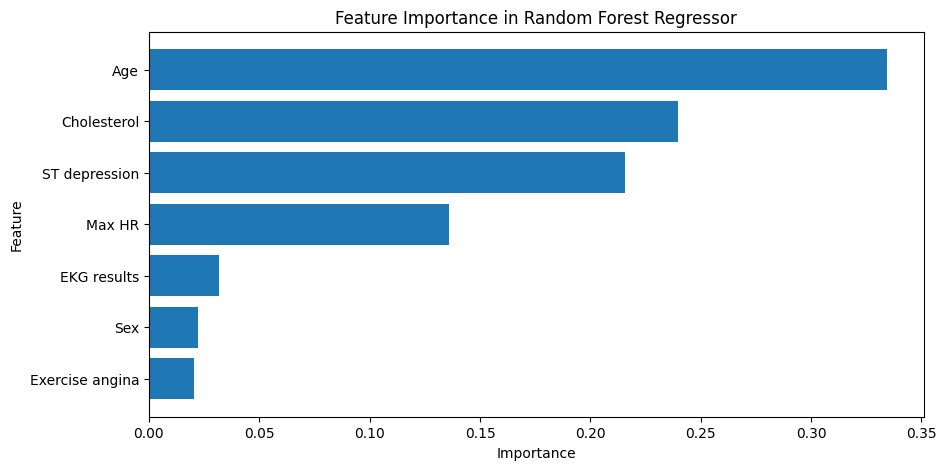

In [166]:
sorted_importance_rf = rf_feature_importance.sort_values(by = 'importance', ascending=True)

plt.figure(figsize=(10, 5))
plt.barh(sorted_importance_rf['feature'], sorted_importance_rf['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Regressor')
plt.show()

### Plotting actual vs predicted values for the testing set (Random Forest)

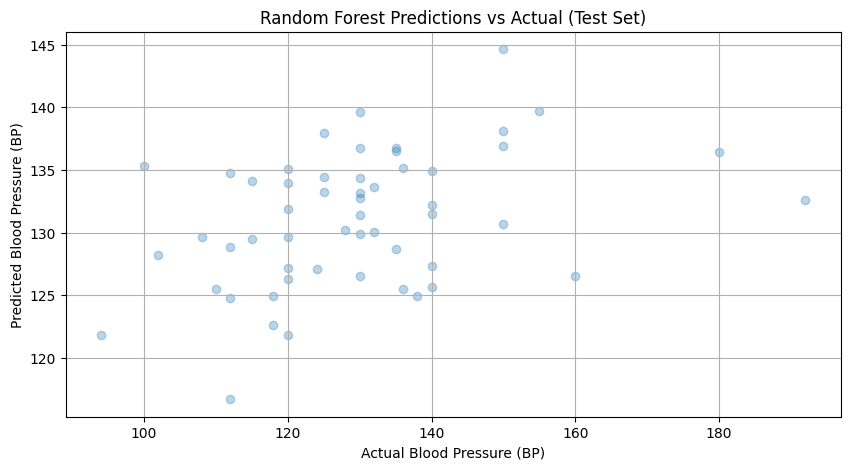

In [167]:

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test_rf, alpha=0.3)
plt.xlabel("Actual Blood Pressure (BP)")
plt.ylabel("Predicted Blood Pressure (BP)")
plt.title("Random Forest Predictions vs Actual (Test Set)")
plt.grid(True)
plt.show()

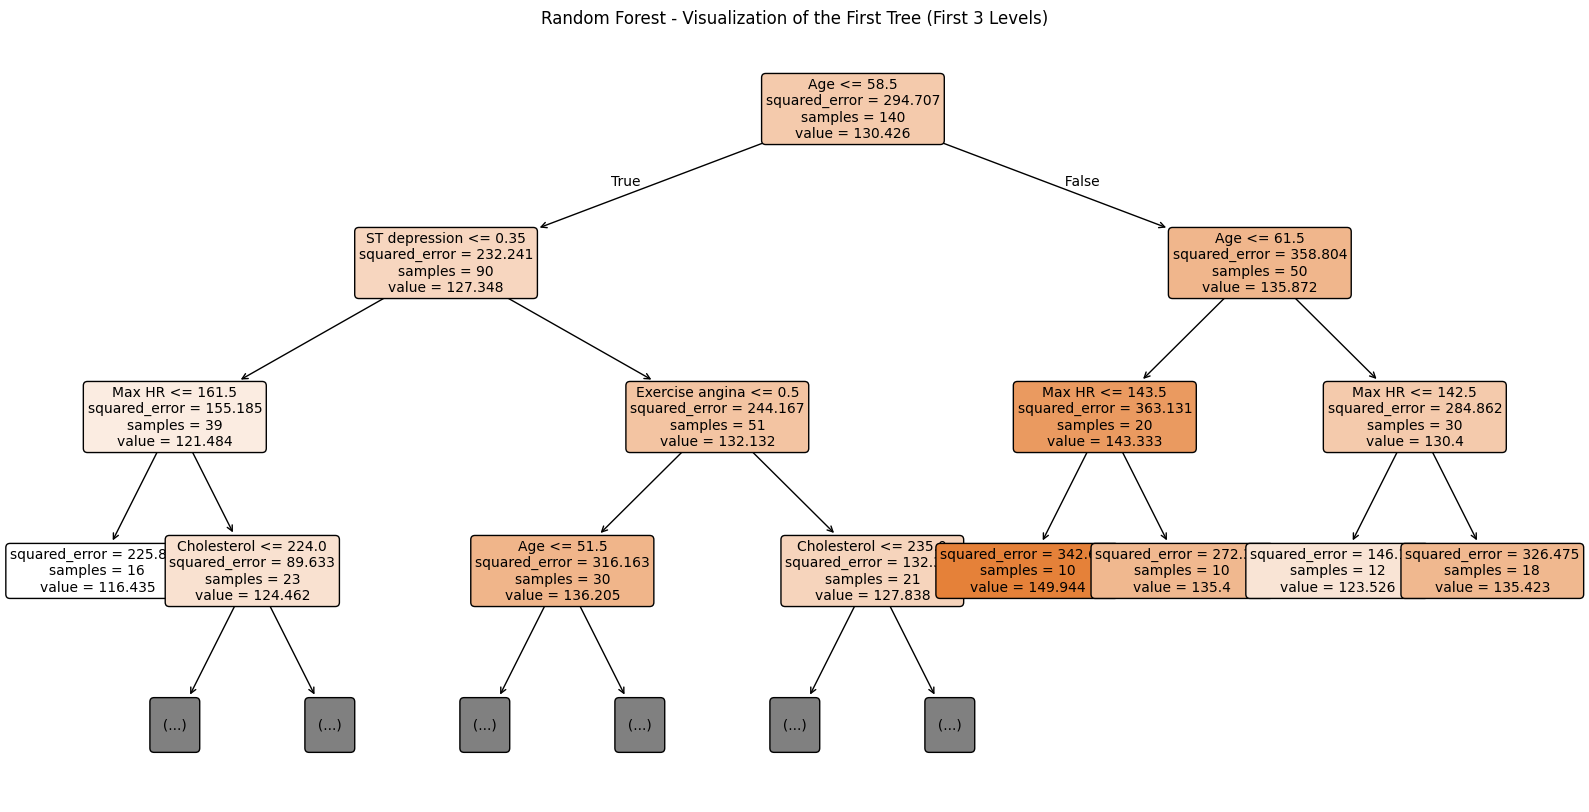

In [168]:
plt.figure(figsize=(20, 10))
features = X.columns

# Access the first estimator (tree) from the Random Forest
# You can change the index ([0], [1], etc.) to view different trees

tree.plot_tree(rf_regressor.estimators_[0],
               feature_names=features,
               max_depth=3,
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Random Forest - Visualization of the First Tree (First 3 Levels)')
plt.show()

# **𝐋𝐨𝐠𝐢𝐬𝐭𝐢𝐜 𝐑𝐞𝐠𝐫𝐞𝐬𝐬𝐢𝐨𝐧**

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [170]:
df_log = pd.read_csv("C:/Users/USER/Downloads/archive (2).zip")

In [171]:
df_log.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [172]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [173]:
df_log.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


### **key observation**

Zero values are likely placeholders for missing data and should be handled.  

In [174]:
(df_log == 0).sum()

Age                          0
Sex                         87
Chest pain type              0
BP                           0
Cholesterol                  0
FBS over 120               230
EKG results                131
Max HR                       0
Exercise angina            181
ST depression               85
Slope of ST                  0
Number of vessels fluro    160
Thallium                     0
Heart Disease                0
dtype: int64

### **Some records have a value of 0. This is expected and valid data in the column below:**

**Sex (1= male, 0 = Female) 
FbS over 120 Fasting blood sugar (1 = True, 0 = False) 
Resting electrocardiogram results (EkG result) : (0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy)
Exercise angina	Exercise-induced angina (1 = Yes, 0 = No)
Number of vessels fluro	Number of major vessels (0, 1, 2,3) colored by fluoroscopy**
#### So,  0 does not mean missing data it is a real and meaningful value.**

#### **However, ST depression have 85 zeros which will be treated as a Nan value so the model cane predict well.**

In [175]:
invalid_zero_col = ['ST depression']

df_log[invalid_zero_col] = df_log[invalid_zero_col].replace(0, np.nan)

In [176]:
df_log.isnull().sum()

Age                         0
Sex                         0
Chest pain type             0
BP                          0
Cholesterol                 0
FBS over 120                0
EKG results                 0
Max HR                      0
Exercise angina             0
ST depression              85
Slope of ST                 0
Number of vessels fluro     0
Thallium                    0
Heart Disease               0
dtype: int64

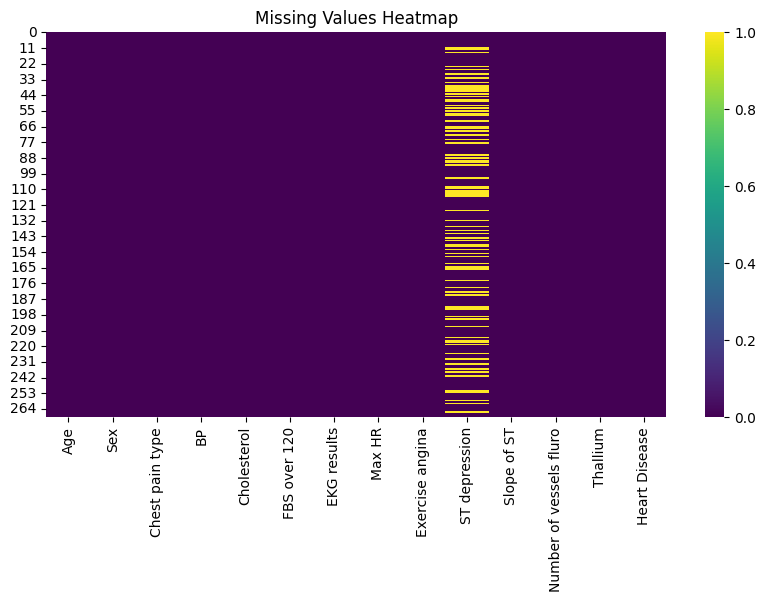

In [177]:
plt.figure(figsize=(10, 5)) 
sns.heatmap(df_log.isnull(), cmap='viridis') #cbar=False
plt.title('Missing Values Heatmap') 
plt.show()

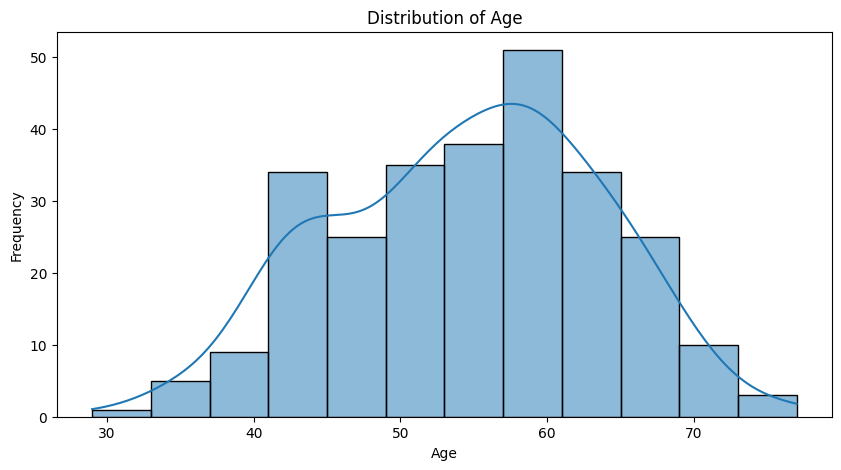

In [178]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_log, x='Age', kde=True) 
plt.title('Distribution of Age')
plt.xlabel('Age') 
plt.ylabel('Frequency')
plt.show()

* The data for Age is roughly normal, with most readings clustered around 40-65 Age range and are fewer high values.

* The highest number of people fall in the 40-65 Age range.


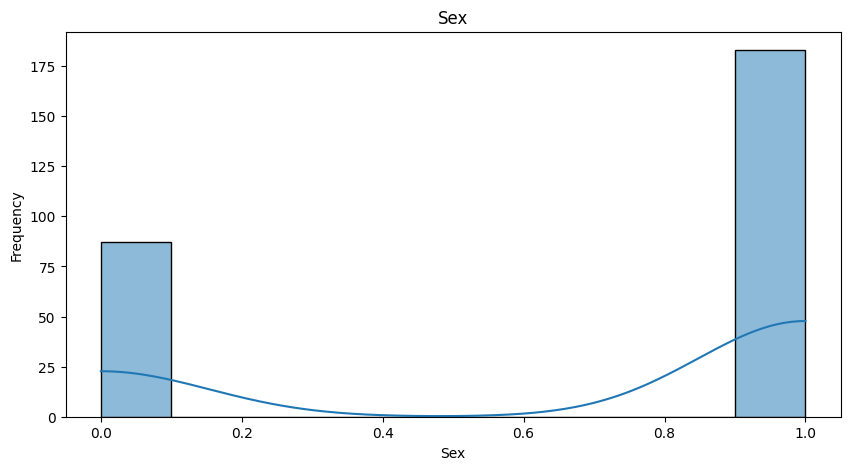

In [179]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_log, x='Sex', kde=True)
plt.title('Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

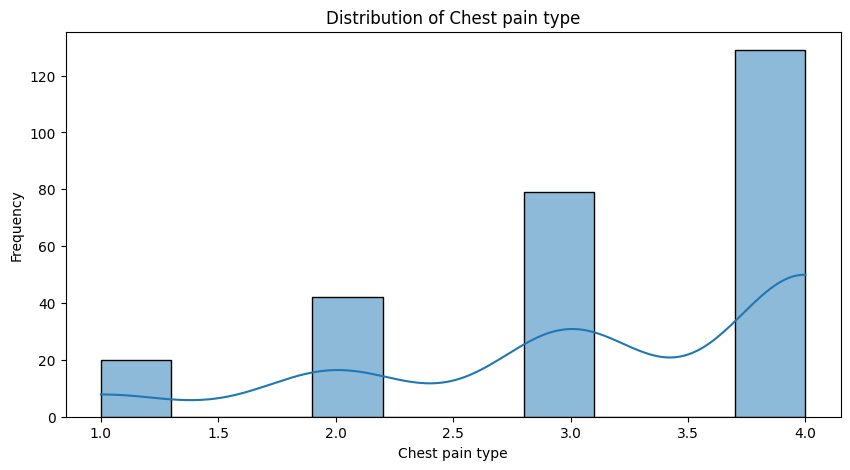

In [180]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_log, x='Chest pain type', kde=True)
plt.title('Distribution of Chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Frequency')
plt.show()

 The Chest pain type data is skewed to the left, meaning most values are on the higher end, with fewer low values.

* The highest concentration of values is around 3–4 .


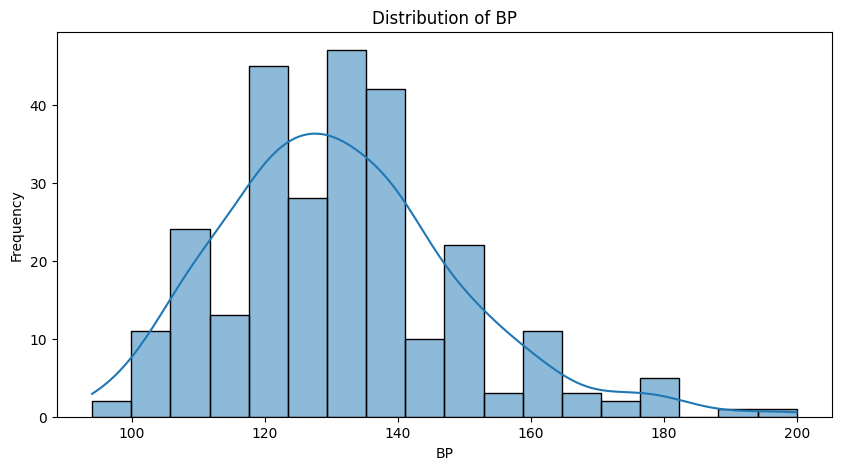

In [181]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_log, x='BP', kde=True)
plt.title('Distribution of BP')
plt.xlabel('BP')
plt.ylabel('Frequency')
plt.show()

The BP values are strongly skewed to the right, meaning most values are very low, while a small number are very high.

* Many individuals have BP levels near the lower end.

* A few individuals have extremely high BP levels, creating a long tail.


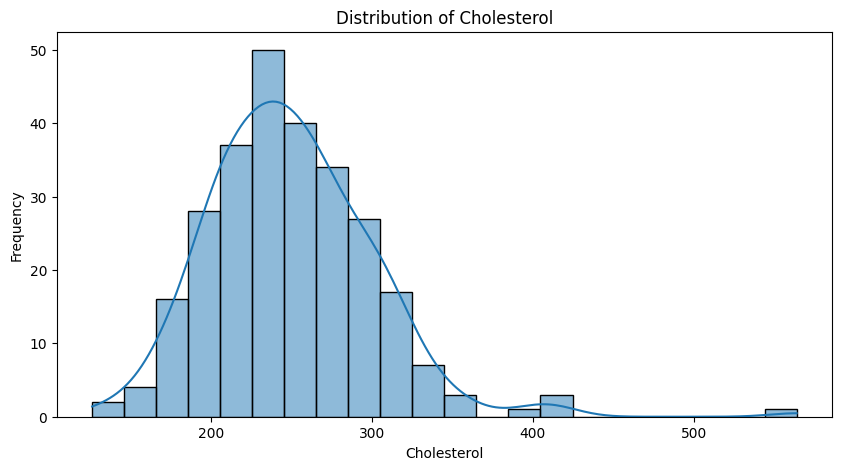

In [182]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_log, x='Cholesterol', kde=True)
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

The Cholesterol values are strongly skewed to the right, meaning most values are very low, while a small number are very high.

* Many individuals have BP levels near the lower end.

* A few individuals have extremely high BP levels, creating a long tail.


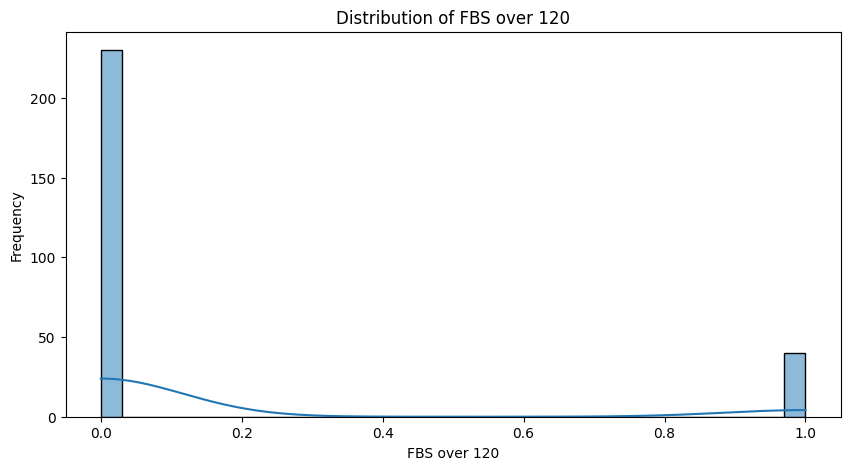

In [183]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_log, x='FBS over 120', kde=True)
plt.title('Distribution of FBS over 120')
plt.xlabel('FBS over 120')
plt.ylabel('Frequency')
plt.show()

The BP values are strongly skewed to the right, meaning most values are very low, while a small number are very high.

* Many individuals have FBS over 120 levels near the lower end.

* A few individuals have extremely high BP levels, creating a long tail.

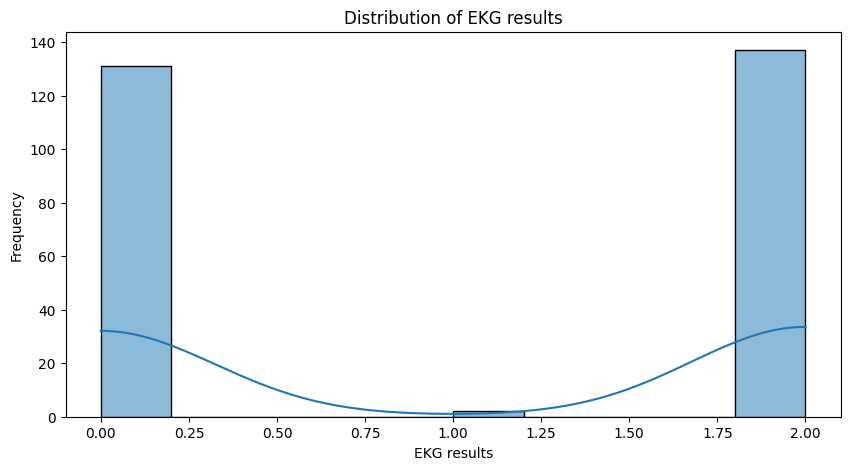

In [184]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_log, x='EKG results', kde=True)
plt.title('Distribution of EKG results')
plt.xlabel('EKG results')
plt.ylabel('Frequency')
plt.show()

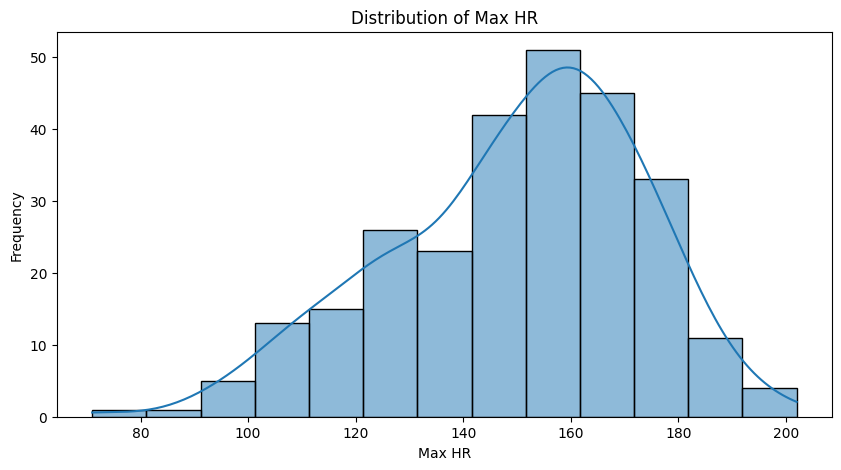

In [185]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_log, x='Max HR', kde=True)
plt.title('Distribution of Max HR')
plt.xlabel('Max HR')
plt.ylabel('Frequency')
plt.show()

 The Max HR  data is skewed to the left, meaning most values are on the higher end, with fewer low values.

* The highest concentration of values is around 120–180 .

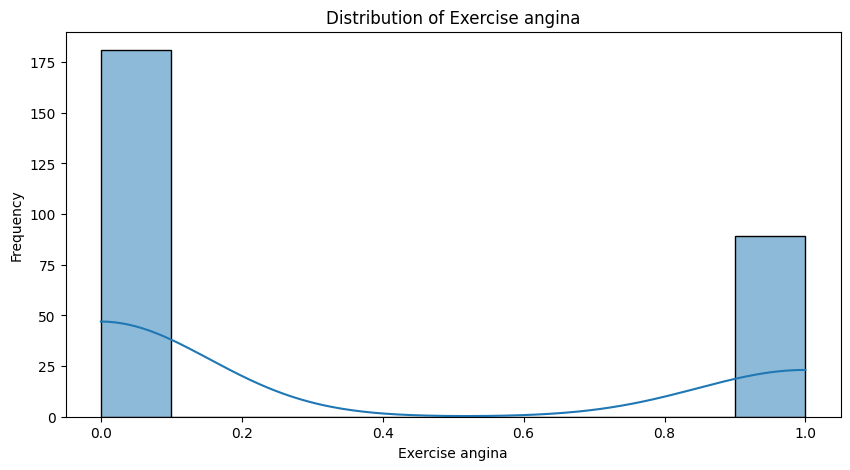

In [186]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_log, x='Exercise angina', kde=True)
plt.title('Distribution of Exercise angina')
plt.xlabel('Exercise angina')
plt.ylabel('Frequency')
plt.show()

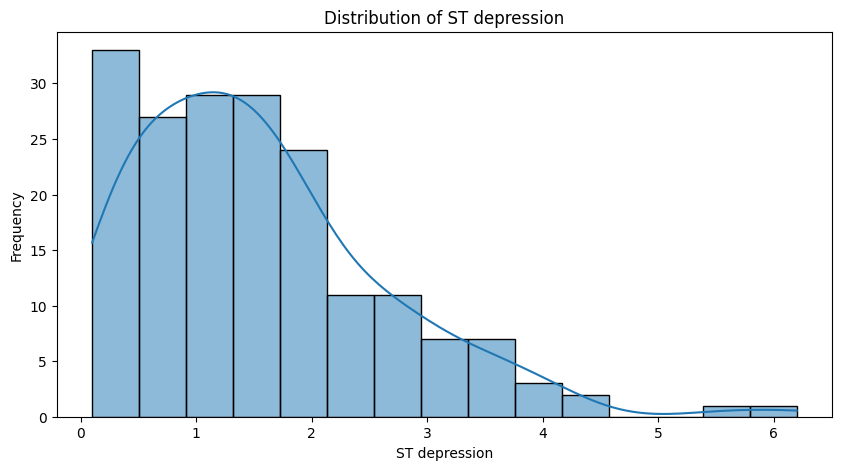

In [187]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_log, x='ST depression', kde=True)
plt.title('Distribution of ST depression')
plt.xlabel('ST depression')
plt.ylabel('Frequency')
plt.show()

The ST depression values are strongly skewed to the right, meaning most values are very low, while a small number are very high.

* Many individuals have ST depression levels near the lower end.

* A few individuals have extremely high ST depression levels, creating a long tail.


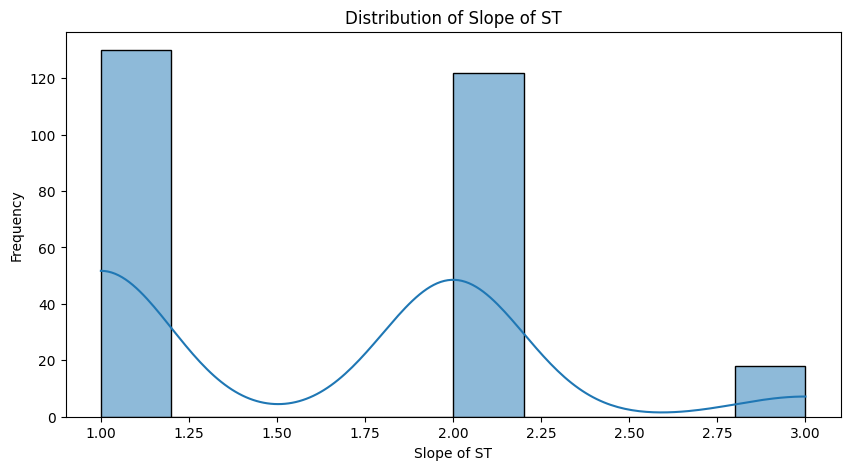

In [188]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_log, x='Slope of ST', kde=True)
plt.title('Distribution of Slope of ST')
plt.xlabel('Slope of ST')
plt.ylabel('Frequency')
plt.show() 

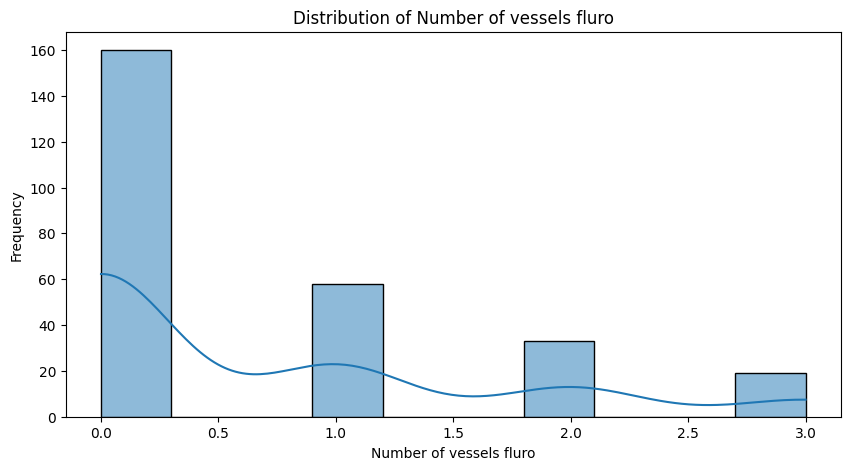

In [189]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_log, x='Number of vessels fluro', kde=True)
plt.title('Distribution of Number of vessels fluro')
plt.xlabel('Number of vessels fluro')
plt.ylabel('Frequency')
plt.show() 

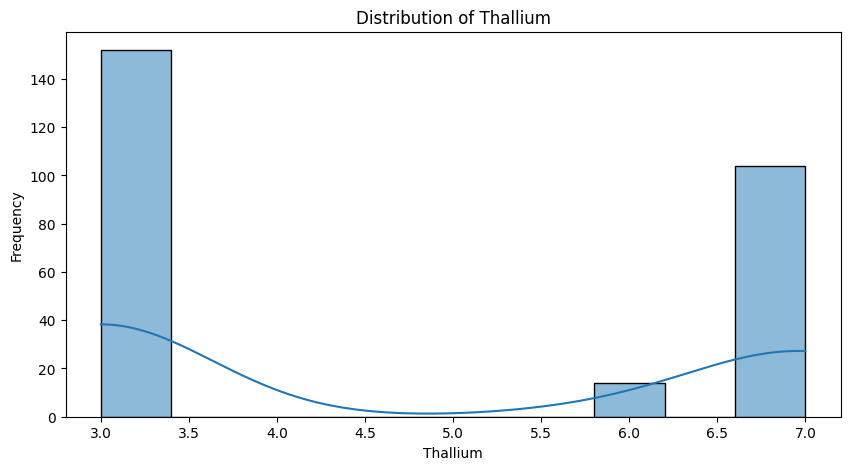

In [190]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_log, x='Thallium', kde=True)
plt.title('Distribution of Thallium')
plt.xlabel('Thallium')
plt.ylabel('Frequency')
plt.show()


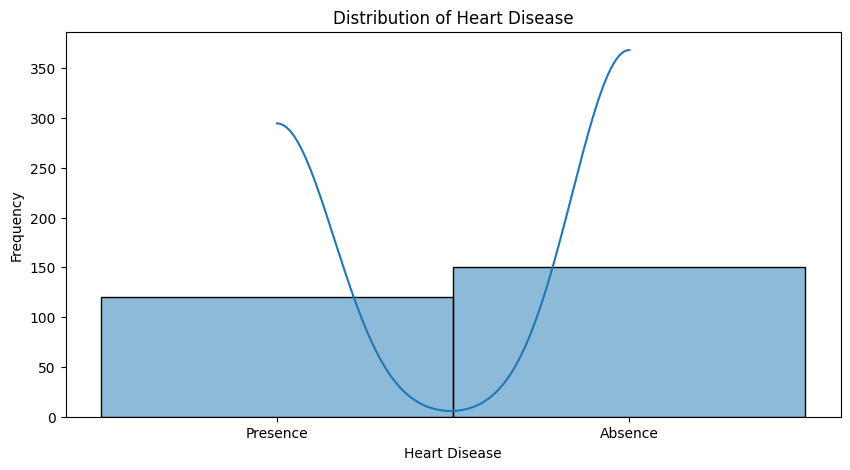

In [191]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_log, x='Heart Disease', kde=True)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Frequency')
plt.show()



In [192]:
# Columns with missing values
col_to_impute = ['ST depression']

# Impute with the median of each column
df_log[col_to_impute] = df_log[col_to_impute].fillna(df_log[col_to_impute].median())

In [193]:
Heart_Disease_counts = df_log['Heart Disease'].value_counts()
print(Heart_Disease_counts)

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64


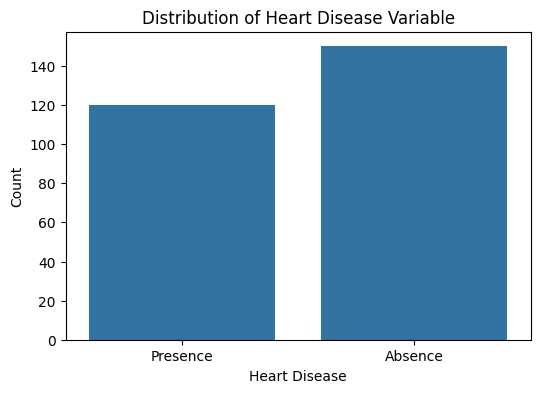

In [194]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_log, x='Heart Disease')
plt.title('Distribution of Heart Disease Variable')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Presence', 'Absence'])
plt.show()

In [195]:
X = df_log[['Age','Sex','Cholesterol', 'BP','EKG results','Max HR','Exercise angina','ST depression']]
y = df_log['Heart Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [196]:
model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [197]:
y_train_pred = model_log.predict(X_train)
print(y_train_pred[:10])

['Absence' 'Presence' 'Absence' 'Absence' 'Absence' 'Presence' 'Presence'
 'Absence' 'Presence' 'Absence']


In [198]:
y_test_pred = model_log.predict(X_test)
print(y_test_pred[:10])

['Absence' 'Absence' 'Absence' 'Presence' 'Presence' 'Absence' 'Absence'
 'Presence' 'Absence' 'Absence']


In [199]:
results_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
print("Actual vs Predicted values:")
display(results_df.head(5))

Actual vs Predicted values:


,Actual,Predicted
78,Absence,Absence
121,Presence,Presence
27,Absence,Absence
198,Absence,Absence
218,Absence,Absence


In [200]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("Actual vs Predicted values:")
display(results_df.head())

Actual vs Predicted values:


,Actual,Predicted
195,Absence,Absence
132,Absence,Absence
162,Absence,Absence
129,Presence,Presence
66,Absence,Presence


In [201]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_log.coef_[0]})
feature_importance = feature_importance.sort_values('Coefficient', ascending=False)
display(feature_importance)

,Feature,Coefficient
1,Sex,1.699174
6,Exercise angina,1.203155
7,ST depression,0.708948
4,EKG results,0.089899
0,Age,0.032847
3,BP,0.009279
2,Cholesterol,0.006513
5,Max HR,-0.029542


# **Model Evaluation - Accuracy**

In [202]:
# Accuracy on the training set
y_train_pred = model_log.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 0.79


In [203]:
# Accuracy on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

Testing Accuracy: 0.74


# Confusion Matrix

In [204]:

print(f"\nConfusion Matrix (Test Set):")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)


Confusion Matrix (Test Set):
[[24  6]
 [ 8 16]]


In [205]:
# Confusion Matrix for train set
print(f"\nConfusion Matrix (Test Set):")
cm_train = confusion_matrix(y_train, y_train_pred)
print(cm)


Confusion Matrix (Test Set):
[[24  6]
 [ 8 16]]


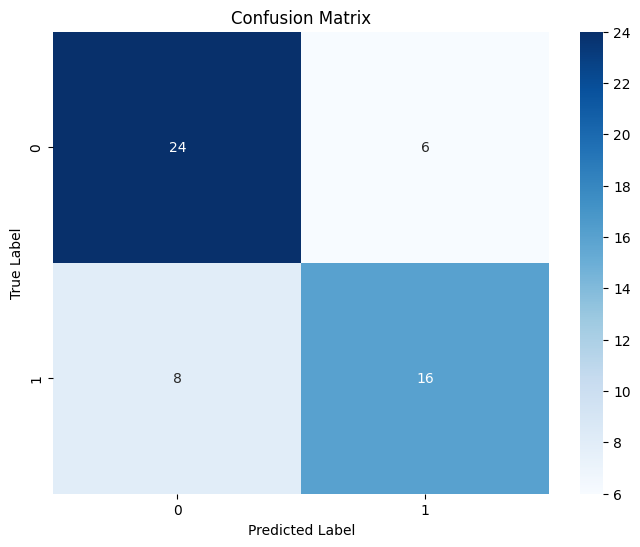

In [206]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

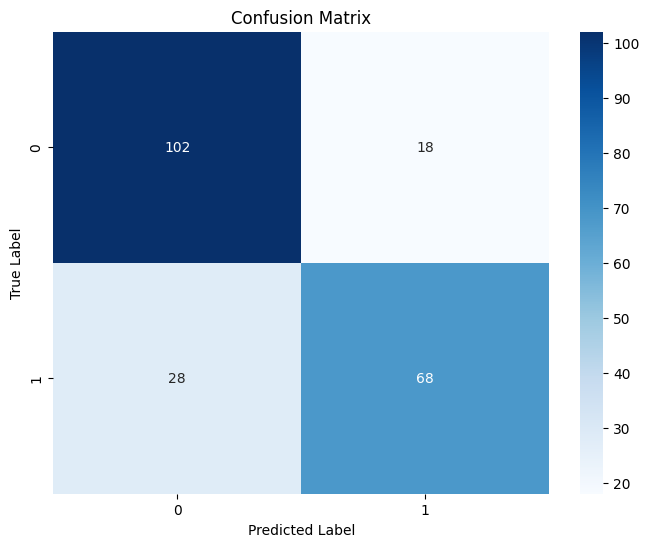

In [207]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [208]:
joblib.dump(model_log, 'HeartDX_Predictor')

['HeartDX_Predictor']

In [210]:
HeartDX_Predictor = joblib.load('HeartDX_Predictor')

In [211]:
HeartDX_Predictor

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [212]:
HeartDX_Predictor.predict(X_test)

array(['Absence', 'Absence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Presence', 'Presence', 'Presence',
       'Absence', 'Presence'], dtype=object)